In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_train_path = '/content/drive/MyDrive/manuscript/training_dataset'
data_validation_path = '/content/drive/MyDrive/manuscript/validation_dataset'
data_test_path = '/content/drive/MyDrive/manuscript/testing_dataset'

In [ ]:
img_width = 180
img_height = 180

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False
)

data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False
)

Found 762 files belonging to 4 classes.
Found 469 files belonging to 4 classes.


In [ ]:
# Load the dataset
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32
)

Found 2409 files belonging to 4 classes.


In [ ]:
# Define class names (only Pali, Sinhala, Sanskrit, and Unknown)
valid_languages = ['Pali', 'Sinhala', 'Sanskrit','Unknown']
data_cat = valid_languages  # Add Unknown to handle other languages

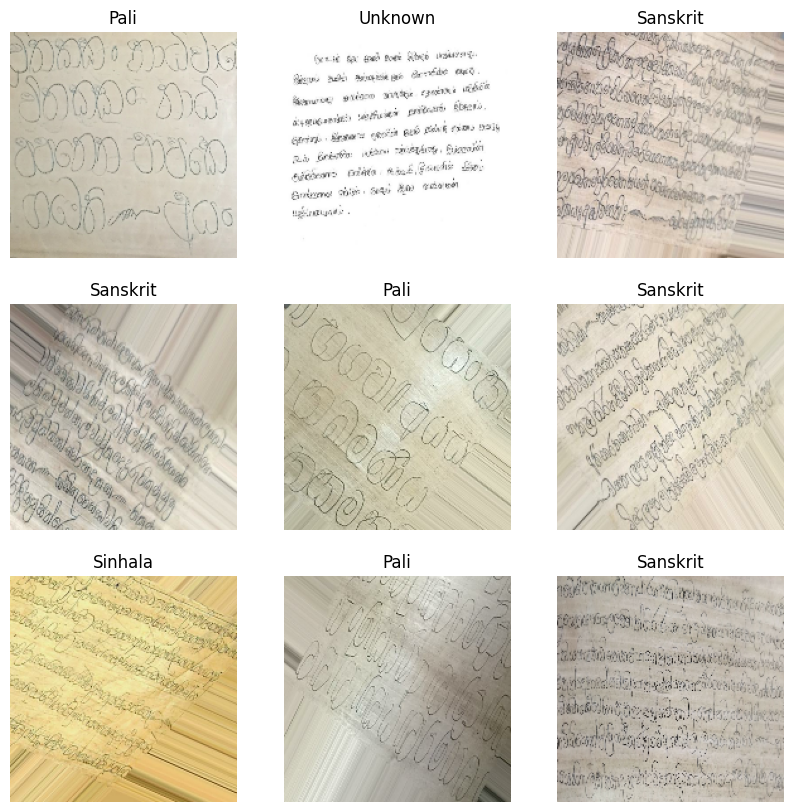

In [ ]:
# Visualize the dataset
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
plt.show()

In [ ]:
# Define data augmentation layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [ ]:
# Build the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_width, img_height, 3)),
    data_augmentation,  # Data augmentation for training
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat), activation='softmax')  # Softmax for multi-class classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:

# Train the model
epochs_size = 10
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


76/76 ━━━━━━━━━━━━━━━━━━━━ 380s 5s/step - accuracy: 0.5949 - loss: 0.8981 - val_accuracy: 0.8215 - val_loss: 0.4141
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.7754 - loss: 0.5331 - val_accuracy: 0.7559 - val_loss: 0.7338
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.8768 - loss: 0.3698 - val_accuracy: 0.5722 - val_loss: 2.0029
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.9351 - loss: 0.1822 - val_accuracy: 0.8281 - val_loss: 0.4437
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 223ms/step - accuracy: 0.9177 - loss: 0.2364 - val_accuracy: 0.7598 - val_loss: 0.7996
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 198ms/step - accuracy: 0.9400 - loss: 0.1603 - val_accuracy: 0.5761 - val_loss: 1.8691
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.9446 - loss: 0.1435 - val_accuracy: 0.7349 - val_loss: 1.0718
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 217ms/step - accuracy: 0.9430 - loss: 0.1598 - val_accuracy: 0.6614 

In [ ]:

# Plot accuracy & loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# Visualize training and validation accuracy and loss
epochs_range = range(epochs_size)
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

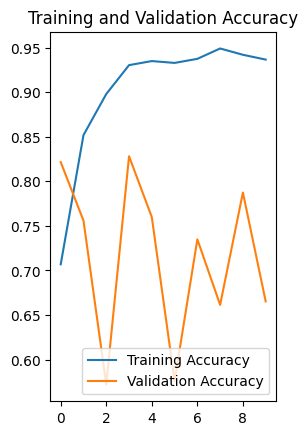

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

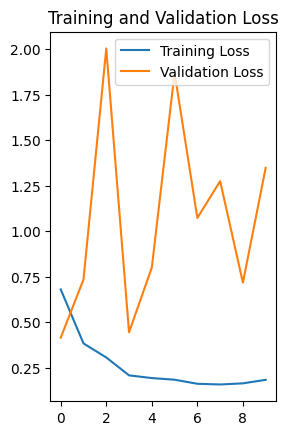

In [ ]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
plt.show()

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/manuscript/language_identifier.h5')

In [ ]:
# Testing the model with test dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
true_labels = np.concatenate([labels.numpy() for _, labels in data_test])
predictions = model.predict(data_test)
predicted_labels = np.argmax(predictions, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


In [ ]:
# Calculate and print the accuracy
# Evaluate on test data
test_loss, test_acc = model.evaluate(data_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

15/15 ━━━━━━━━━━━━━━━━━━━━ 139s 9s/step - accuracy: 0.5952 - loss: 1.9140
Test Accuracy: 69.72%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/manuscript/language_identifier.h5')


In [ ]:
# Class names
class_names = ['Pali', 'Sinhala', 'Sanskrit', 'unknown']

In [ ]:

class_names = data_train.class_names  # Auto detect correct labels

def predict_image(img_path, threshold=0.60):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    predictions = model.predict(img_array)

    predicted_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_index]

    if confidence < threshold:
        predicted_language = 'unknown'
    else:
        predicted_language = class_names[predicted_index]

    print(f"Predicted Language : {predicted_language}")
    print(f"Confidence : {confidence * 100:.2f}%")

    print("\nClass-wise Confidence:")
    for idx, lang in enumerate(class_names):
        print(f"{lang} : {predictions[0][idx] * 100:.2f}%")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{predicted_language} ({confidence * 100:.2f}%)")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Language : unknown
Confidence : 100.00%

Class-wise Confidence:
pali : 0.00%
sanskrutha : 0.00%
sinhala : 0.00%
unknown : 100.00%


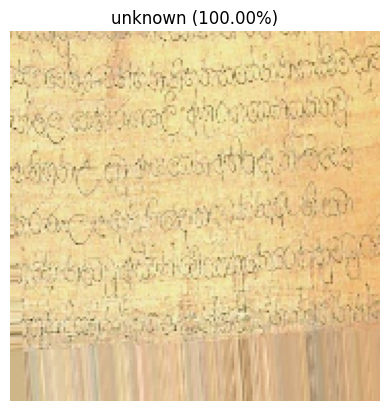

In [ ]:
img_path = '/content/drive/MyDrive/manuscript/testing_dataset/sanskrutha/aug_image00003 (3) - Copy_0_3848.jpg'  # change to your image
predict_image(img_path)

In [ ]:
import os

print("Class Names:", data_train.class_names)

for class_name in data_train.class_names:
    class_path = f'{data_train_path}/{class_name}'
    print(f"{class_name} : {len(os.listdir(class_path))} images")


Class Names: ['pali', 'sanskrutha', 'sinhala', 'unknown']
pali : 750 images
sanskrutha : 747 images
sinhala : 750 images
unknown : 162 images


In [ ]:
print(data_train.class_names)


['pali', 'sanskrutha', 'sinhala', 'unknown']


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_height, img_width = 224, 224
batch_size = 32

In [ ]:
data_train = image_dataset_from_directory(data_train_path, image_size=(img_height, img_width), batch_size=batch_size)
data_val = image_dataset_from_directory(data_validation_path, image_size=(img_height, img_width), batch_size=batch_size)
data_test = image_dataset_from_directory(data_test_path, image_size=(img_height, img_width), batch_size=batch_size)

AUTOTUNE = tf.data.AUTOTUNE
data_train = data_train.prefetch(buffer_size=AUTOTUNE)
data_val = data_val.prefetch(buffer_size=AUTOTUNE)
data_test = data_test.prefetch(buffer_size=AUTOTUNE)

Found 2409 files belonging to 4 classes.
Found 762 files belonging to 4 classes.
Found 469 files belonging to 4 classes.


In [ ]:
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base layers

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')  # 4 classes
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train
history = model.fit(data_train, validation_data=data_val, epochs=10)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 40s 357ms/step - accuracy: 0.7497 - loss: 0.6214 - val_accuracy: 0.9908 - val_loss: 0.0441
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 228ms/step - accuracy: 0.9727 - loss: 0.0846 - val_accuracy: 0.9948 - val_loss: 0.0214
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - accuracy: 0.9909 - loss: 0.0390 - val_accuracy: 0.9974 - val_loss: 0.0178
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 228ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9974 - val_loss: 0.0116
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 203ms/step - accuracy: 0.9958 - loss: 0.0147 - val_accuracy: 0.9961 - val_loss: 0.0123
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - accuracy: 0.9957 - loss: 0.0235 - val_accuracy: 0.9974 - val_loss: 0.0102
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.9999 - loss: 0.0069 - val_accuracy: 0.9974 - val_loss: 0.0105
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.9985 - loss: 0.0093 - val_accu

In [ ]:
# Evaluate
loss, acc = model.evaluate(data_test)
print("Test Accuracy:", acc)

15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 443ms/step - accuracy: 0.9969 - loss: 0.0062
Test Accuracy: 0.9957355856895447


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

class_names = ['pali', 'sanskrutha', 'sinhala', 'unknown']

img_path = '/content/drive/MyDrive/manuscript/testing_dataset/sinhala/IMG_20241115_152507.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

pred = model.predict(img_array)
confidence = np.max(pred)
predicted_class = class_names[np.argmax(pred)]

print(f"Predicted Language: {predicted_class}")
print(f"Confidence: {confidence*100:.2f}%")

# Class-wise Confidence
for name, score in zip(class_names, pred[0]):
    print(f"{name} : {score*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Language: sinhala
Confidence: 100.00%
pali : 0.00%
sanskrutha : 0.00%
sinhala : 100.00%
unknown : 0.00%


In [ ]:
model.save('/content/drive/MyDrive/manuscript/language_identifier_mobilenetv2.h5')  # Save to the specified path


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
import PIL
print(PIL.__version__)


11.1.0
